[View in Colaboratory](https://colab.research.google.com/github/leslyarun/pytorch-learn/blob/master/pytorchintro.ipynb)

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58348000 @  0x7f5b420932a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


# No inplace operations in Pytorch

In [132]:
torch.cuda.is_available() # check if cuda is available in the device

True

In [133]:
a = torch.tensor([1,2,3]) # creating a new tensor
a

tensor([1, 2, 3])

In [134]:
a+1

tensor([2, 3, 4])

In [135]:
a= a.cuda() # make the tensor run in gpu
a*4

tensor([ 4,  8, 12], device='cuda:0')

In [0]:
b = [[1,2],[2,3],[3,4]]

In [137]:
b


[[1, 2], [2, 3], [3, 4]]

In [138]:
b = torch.tensor([[1,2],[2,3],[3,4]])
b

tensor([[1, 2],
        [2, 3],
        [3, 4]])

In [139]:
b.shape

torch.Size([3, 2])

In [140]:
b = b.reshape(2,3)
b

tensor([[1, 2, 2],
        [3, 3, 4]])

In [141]:
b.dtype

torch.int64

In [142]:
b.device

device(type='cpu')

In [143]:
b.layout

torch.strided

In [144]:
b = b.cuda()
b.device

device(type='cuda', index=0)

In [0]:
c = torch.rand(2,1)

In [146]:
c

tensor([[0.3700],
        [0.6924]])

# **Tensor operations should be performed on same dtype and same device**

In [0]:
import numpy as np

In [0]:
z = np.array([1,2,3])

In [149]:
a = torch.Tensor(z) # Class constructor by default creates float32 dtype
a.dtype

torch.float32

In [150]:
b = torch.tensor(z) # All other here and below are factory functions, which chooses dtype based on data passed -> it does type inference
b.dtype

torch.int64

In [151]:
c = torch.as_tensor(z)
c.dtype

torch.int64

In [152]:
d = torch.from_numpy(z)
d.dtype

torch.int64

In [153]:
e = torch.tensor(z , dtype=torch.float64) # explicitly mentioning dtype.
e

tensor([1., 2., 3.], dtype=torch.float64)

In [154]:
z = np.array([4,3,2])
z

array([4, 3, 2])

In [155]:
a = torch.Tensor(z)
a

tensor([4., 3., 2.])

In [156]:
b = torch.tensor(z)
b

tensor([4, 3, 2])

a and b return the numpy value

In [157]:
# change the numpy value z
z[0] = 0
z

array([0, 3, 2])

In [158]:
# now check the a and b tensors to check if the change in z has reflected 
print(a)
print(b)

tensor([4., 3., 2.])
tensor([4, 3, 2])


In [159]:
# As seen above, changes are not reflected. Lets try for as_tensor and from_numpy
z = np.array([4,3,2])
z

array([4, 3, 2])

In [160]:
c = torch.as_tensor(z) # Can accept any python array like data structure
c

tensor([4, 3, 2])

In [161]:
d = torch.from_numpy(z)
d

tensor([4, 3, 2])

In [162]:
# change the numpy value z
z[0] = 0
z

array([0, 3, 2])

In [163]:
# Change in z is reflected in c,d
print(c)
print(d)

tensor([0, 3, 2])
tensor([0, 3, 2])


# torch.Tensor() and torch.tensor() copy their input data while torch.as_tensor() and torch.from_numpy() share their input data in memory with the original input object.

In [164]:
# torch tensor to numpy array
print(c.dtype)
c = c.numpy()

torch.int64


In [165]:
type(c)

numpy.ndarray

Some things to keep in mind (memory sharing works where it can):

Since numpy.ndarray objects are allocated on the CPU, the as_tensor() function must copy the data from the CPU to the GPU when a GPU is being used.
The memory sharing of as_tensor() doesn’t work with built-in Python data structures like lists.
The as_tensor() call requires developer knowledge of the sharing feature. This is necessary so we don’t inadvertently make an unwanted change in the underlying data without realizing the change impacts multiple objects.
The as_tensor() performance improvement will be greater when there are a lot of back and forth operations between numpy.ndarray objects and tensor objects. However, if there is just a single load operation, there shouldn’t be much impact from a performance perspective.

# Tensor Operations

*   Reshaping operations
*  Element-wise operations
*  Reduction operations
*   Access operations






In [166]:
j = torch.tensor([
    [1,2,3],
    [3,4,5]
])
j

tensor([[1, 2, 3],
        [3, 4, 5]])

In [167]:
j.numel() # return no. of elements in a tensor

6

In [168]:
j.shape

torch.Size([2, 3])

In [169]:
j.reshape(3,2)

tensor([[1, 2],
        [3, 3],
        [4, 5]])

In [170]:
j.reshape(1,2,3)


tensor([[[1, 2, 3],
         [3, 4, 5]]])

In [171]:
j.reshape(1,1,2,3) # u can reshape to any no. of dimensions, untill the no.of elements are same

tensor([[[[1, 2, 3],
          [3, 4, 5]]]])

In [0]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

In [0]:
t = torch.stack((t1, t2, t3)) # stack will add a dimension and stack the tensors

In [174]:
t.shape

torch.Size([3, 4, 4])

In [175]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [0]:
t = t.reshape(3,1,4,4)

In [177]:
t # example of image tensor passed in cnn. (3-batch size means 3 images, 1- no.of color channel, 4-height, 4-width)

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [178]:
t.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [179]:
t.flatten(start_dim=1).shape # tells from which axis we should start flattening

torch.Size([3, 16])

In [180]:
t.flatten(start_dim=1) # flatten will reduce dimension to 1 (even if there are 100 dimensions, it will be reduced to 1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [0]:
y = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [182]:
y.reshape(12,1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

# Squeeze, Unsqueeze

In [183]:
# Squeezing a tensor removes the dimensions or axes that have a length of one.
# Unsqueezing a tensor adds a dimension with a length of one.

print(y.reshape([1,12]))
print(y.reshape([1,12]).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [184]:
print(y.reshape([1,12]).squeeze())
print(y.reshape([1,12]).squeeze().shape) # squeeze removes 1-dimension 

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [185]:
print(y.reshape([1,12]).squeeze().unsqueeze(dim=0))
print(y.reshape([1,12]).squeeze().unsqueeze(dim=0).shape) # unsqueeze adds 1 dimension

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [0]:
def flatten(t):
    t = t.reshape(1, -1) # -1 means it will automatically infers the value. As seen above, shape is (1,12). 
                          # when we try to reshape, based on no.of elements (i.e. 12 here), it automatically finds (1,12) should be shape. 
    t = t.squeeze()
    return t

In [187]:
t = torch.ones(4, 3)
t

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [188]:
flatten(t) # example of above flatten fn.

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Broadcasting

In [0]:
# element wise operations
# An element-wise operation operates on corresponding elements between tensors.
# Two tensors must have the same shape in order to perform element-wise operations on them. Or u should perform element wise operations on a scalar value

In [190]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)
print(t1)
print(t2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[9., 8.],
        [7., 6.]])


In [191]:
t1 + t2 # Addition is an element-wise operation. all the arithmetic operations, add, subtract, multiply, and divide are element-wise operations.

tensor([[10., 10.],
        [10., 10.]])

In [192]:
# arithmetic operations using scalar values - Using these symbolic operations:
print(t + 2)
print(t - 2)
print(t * 2)
print(t / 2)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])


In [193]:
# arithmetic operations using scalar values - Using built-in tensor object methods:
print(t1.add(2))
print(t1.sub(2))
print(t1.mul(2))
print(t1.div(2))


tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [194]:
# Broadcasting is the concept whose implementation allows us to add scalars to higher dimensional tensors.
# Let's think about the t1 + 2 operation.
# Here, the scaler valued tensor is being broadcasted to the shape of t1, and then, the element-wise operation is carried out.
# We can see what the broadcasted scalar value looks like using the broadcast_to() Numpy function:
import numpy as np
np.broadcast_to(2, t1.shape)

array([[2, 2],
       [2, 2]])

In [195]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)
print(t1)
print(t2)

tensor([[1., 1.],
        [1., 1.]])
tensor([2., 4.])


In [196]:
print(t1.shape)
print(t2.shape)

torch.Size([2, 2])
torch.Size([2])


In [197]:
# t1 + t2 ???????
# Always the lower ranked tensor (t2 here) will be transformed(broadcasted) to higher rank tensor (t1 here)
np.broadcast_to(t2.numpy(), t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [198]:
t1 + t2

tensor([[3., 5.],
        [3., 5.]])

In [199]:
t3 = torch.tensor([[2,3]], dtype=torch.float32)
t3.shape

torch.Size([1, 2])

In [200]:
t1 + t3


tensor([[3., 4.],
        [3., 4.]])

In [201]:
t4 = torch.tensor([[2,3,4]], dtype=torch.float32)
t4.shape

torch.Size([1, 3])

In [202]:
t1 + t4 # won't work
# In order for broadcasting to work, the length of last axis should be same . 
# example -> (2,2) and (1,2) will work (since 2 is the length of last dimension in both tensord), but not (2,2) and (1,3), and also for (2,2) and (1,1,3)

RuntimeError: ignored

In [203]:
t1 = torch.tensor([
    [1]
], dtype=torch.float32)

t2 = torch.tensor([[2,4,3,2]], dtype=torch.float32)
print(t1.shape)
print(t2.shape)

torch.Size([1, 1])
torch.Size([1, 4])


# Rules to see if broadcasting will work:



**Step 1: Determine if tensors are compatible**




* Start by comparing dimensions from backwards

The dimensions are compatible when either:

*   They’re equal to each other.
*   One of them is equal to 1.

**Step 2: Determine the shape of the resulting tensor**

Comparing the shape of (1, 3) to (3, 1), we first calculate the max of the last dimension.

The max of 3 and 1 is 3. 3 will be the last dimension of the shape of the resulting tensor.

Moving on to the next dimension, again, the max of 1 and 3 is 3. So, 3 will be the next dimension of the shape of the resulting tensor.

We’ve now stepped through each dimension of the shapes of the original tensors. We can conclude that the resulting tensor will have shape (3, 3).

The original tensors of shape (1, 3) and (3, 1) will now be expanded to shape (3, 3) in order to do the element-wise operation.

Broadcasting can be thought of as copying the existing values within the original tensor and expanding that tensor with these copies until it reaches the required shape.

http://deeplizard.com/learn/video/6_33ulFDuCg



In [204]:
t1 + t2

tensor([[3., 5., 4., 3.]])

In [205]:
# element wise comparison operations
# for every element , it comparesand returns 1-true or 0-false 
t.eq(0)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

In [206]:
t.ge(0)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

In [207]:
# Element-wise operations using functions (element wise is also called as point-wise, component-wise)
t.abs() 


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [208]:
t.sqrt()

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [209]:
t.neg().abs()

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

# Reduction Operations

Aggregate functions like **sum(), prod(), mean(), std()** will reduce tensor to scalar value

In [0]:
 t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)

In [211]:
t.sum()

tensor(8.)

In [212]:
t.numel()

9

In [213]:
t.sum().numel()

1

In [214]:
t.mean()

tensor(0.8889)

# Do reduction operations always reduce to a tensor with a single element? -- No

We can reduce elements based on axis

In [0]:
# Reducing tensors by axes
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [216]:
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [217]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

In [0]:
# argmax

t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In [219]:
t.max()

tensor(5.)

In [220]:
t.argmax()

tensor(11)

In [221]:
t.flatten()

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

In [222]:
t.max(dim=0)

(tensor([4., 3., 3., 5.]), tensor([2, 1, 1, 2]))

In [223]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [224]:
t.max(dim=1)

(tensor([2., 3., 5.]), tensor([3, 1, 3]))

In [225]:
t.argmax(dim=1)

tensor([3, 1, 3])

# Access Operations

In [0]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)


In [227]:
t.mean()

tensor(5.)

In [229]:
t.mean().item() # For accessing the mean value - item works only for scalar value

5.0

In [230]:
t.mean(dim=0).tolist()

[4.0, 5.0, 6.0]

In [231]:
t.mean(dim=0).numpy()

array([4., 5., 6.], dtype=float32)

In [3]:
# All aggregate fn. returns a tensor, like below
a = torch.tensor([1,3,7])
a.max()

tensor(7)

1.5707963705062866
0.0


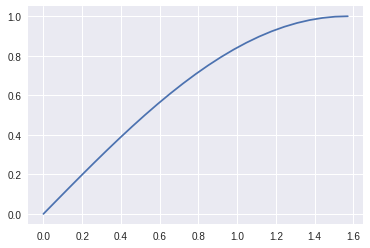

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

a = torch.linspace(0, np.pi/2, 25)
print(a.max().item())
print(a.min().item())
sin_result = torch.sin(a)
plt.plot(a.numpy(), sin_result.numpy())